# 1. Linear Regression
## 공부 간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn  import decomposition

In [6]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [29]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [32]:
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values

df = dataset.values
X = df[:,:-1]
y = df[:,-1]


In [34]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10.,   8.,  14.,  26.,  22.,  30.,  42.,  48.,  38.,  58.,  60.,
         72.,  62.,  68.,  72.,  58.,  76.,  86.,  90., 100.]))

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [20]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

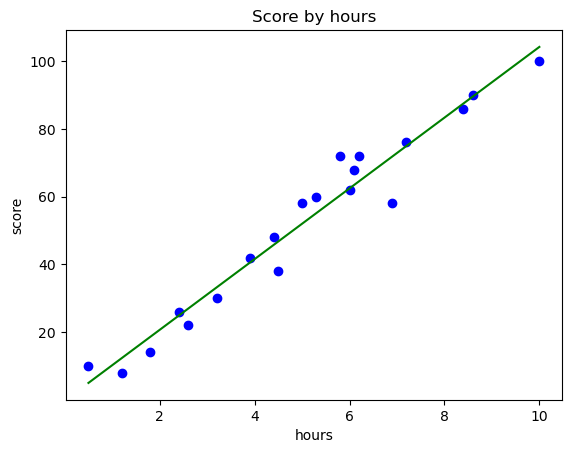

In [25]:
plt.scatter(X,y, color = 'blue')
plt.plot(X, y_pred, color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [24]:
print('9시간 공부했을 떄 예상 점수', reg.predict([[9]])) # [[9],[8],[7]]

9시간 공부했을 떄 예상 점수 [93.77478776 83.33109082 72.88739388]


In [26]:
reg.coef_

array([10.44369694])

In [27]:
reg.intercept_

-0.21848470286721522

y - mx + b -> y = 10.4436 x - 0.2184

## 데이터 세트 분리

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [9]:
df = dataset.values
df

array([[  0.5,  10. ],
       [  1.2,   8. ],
       [  1.8,  14. ],
       [  2.4,  26. ],
       [  2.6,  22. ],
       [  3.2,  30. ],
       [  3.9,  42. ],
       [  4.4,  48. ],
       [  4.5,  38. ],
       [  5. ,  58. ],
       [  5.3,  60. ],
       [  5.8,  72. ],
       [  6. ,  62. ],
       [  6.1,  68. ],
       [  6.2,  72. ],
       [  6.9,  58. ],
       [  7.2,  76. ],
       [  8.4,  86. ],
       [  8.6,  90. ],
       [ 10. , 100. ]])

In [10]:
x = df[:,:-1]
y = df[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =0)

In [12]:
x, len(x)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [16]:
x_train, len(x_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [17]:
x_test, len(x_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

## 분리된 데이터를 통한 모델링

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(x_train, y_train)

LinearRegression()

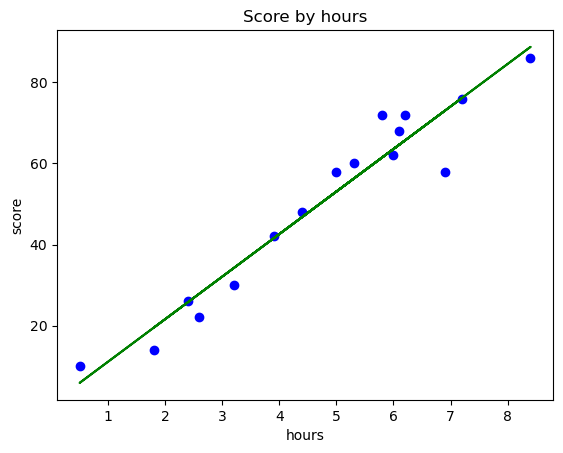

In [23]:
plt.scatter(x_train,y_train, color = 'blue')
plt.plot(x_train, reg.predict(x_train), color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 데이터 시각화(테스트 세트)

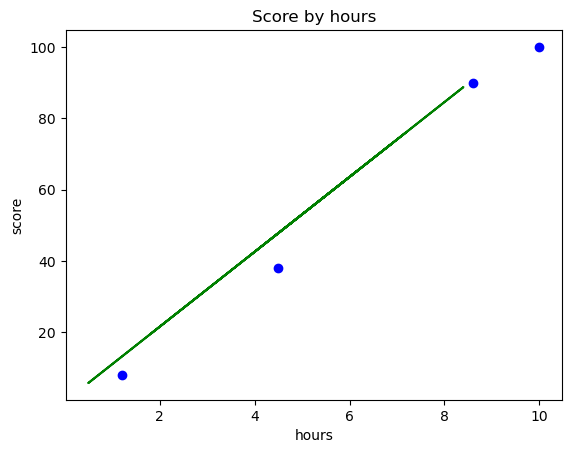

In [25]:
plt.scatter(x_test,y_test, color = 'blue')
plt.plot(x_train, reg.predict(x_train), color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [26]:
reg.coef_

array([10.49161294])

In [29]:
reg.intercept_

0.6115562905169796

In [30]:
reg.score(x_test, y_test) 

0.9727616474310156

# 경사 하강법

max_iter : 훈련 세트 반복 횟수 = (epoch 횟수)
eta0 : 학습률


In [60]:
from sklearn.linear_model import SGDRegressor
# sr = SGDRegressor(max_iter = 1000, eta0=1e-4, random_state = 0, verbose=1)
sr = SGDRegressor()
sr.fit(x_train, y_train)

SGDRegressor()

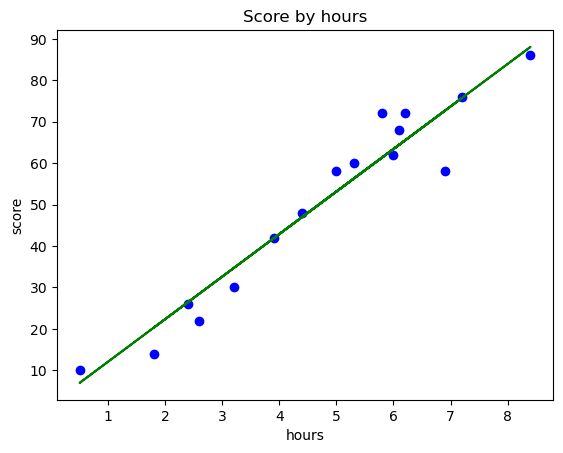

In [61]:
plt.scatter(x_train,y_train, color = 'blue')
plt.plot(x_train, sr.predict(x_train), color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [40]:
sr.coef_, sr.intercept_

(array([10.22956269]), array([1.82550239]))

In [41]:
sr.score(x_test, y_test)

0.9733574171950551